In [3]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd
import xarray as xr

from glob import glob



plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.titlesize'] = 20

In [4]:
#pre-fire data
# Create the path to your data
pre_fire_path = os.path.join("data","pre-woolsey-fire")
                                      
# Generate a list of tif files
pre_fire_paths = glob(os.path.join(pre_fire_path,
                                        "*Raw*.tiff"))

# Sort the data to ensure bands are in the correct order
pre_fire_paths.sort()
pre_fire_paths

['data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B01_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B02_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B03_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B04_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B05_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B06_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B07_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B08_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B09_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B11_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B12_(Raw).tiff',
 'data/pre

In [5]:
#post-fire data
# Get list of all pre-cropped data and sort the data

# Create the path to your data
post_fire_path = os.path.join("data","post-woolsey-fire")
                                      
# Generate a list of tif files
post_fire_paths = glob(os.path.join(post_fire_path,
                                        "*Raw*.tiff"))

# Sort the data to ensure bands are in the correct order
post_fire_paths.sort()
post_fire_paths

['data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B01_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B02_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B03_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B04_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B05_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B06_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B07_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B08_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B09_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B11_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B12_(Raw).tiff',

In [6]:
def open_clean_bands(band_path):
    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [7]:
band_list = []
for i, aband in enumerate(post_fire_paths):
    band_list.append(open_clean_bands(aband))
    band_list[i]["band"]=i+1

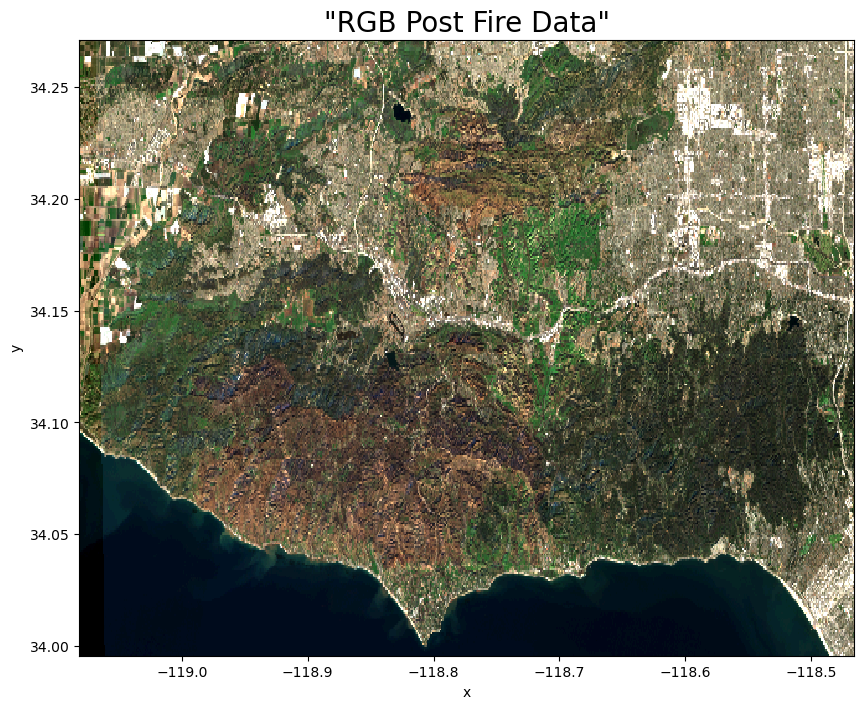

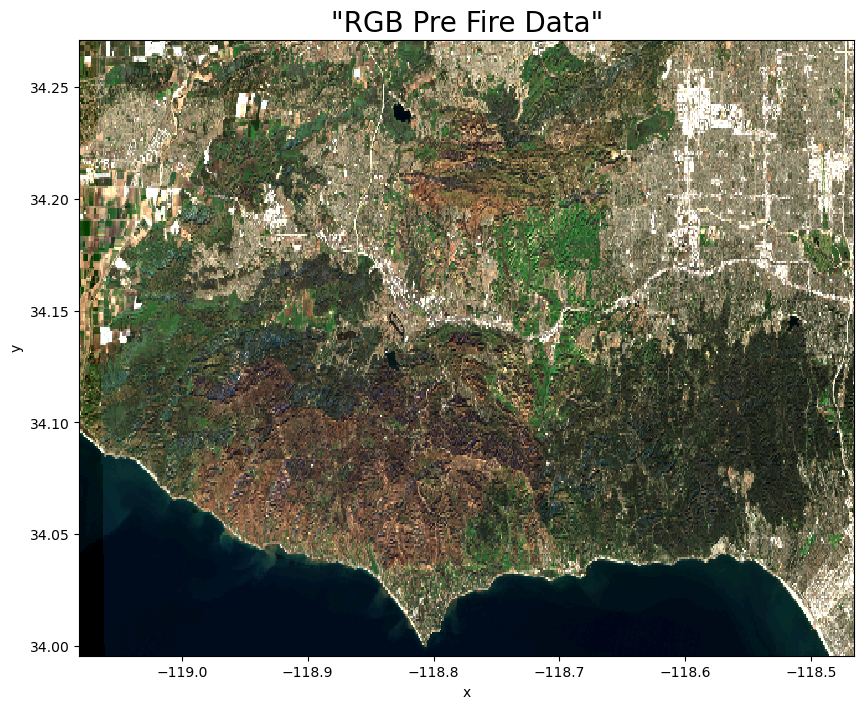

In [8]:
#need an array and then plot for both dates of pre and post fire data. 
post_fire_xr = xr.concat(band_list, dim="band") 

post_fire_rgb = (post_fire_xr[[3,2,1],:,:])
post_fire_rgb.plot.imshow(rgb="band",robust = True, figsize=(10, 8))
plt.title('"RGB Post Fire Data"')
plt.show()

pre_fire_xr = xr.concat(band_list, dim="band") 

pre_fire_rgb = (post_fire_xr[[3,2,1],:,:])
pre_fire_rgb.plot.imshow(rgb="band",robust = True, figsize=(10, 8))
plt.title('"RGB Pre Fire Data"')
plt.show()

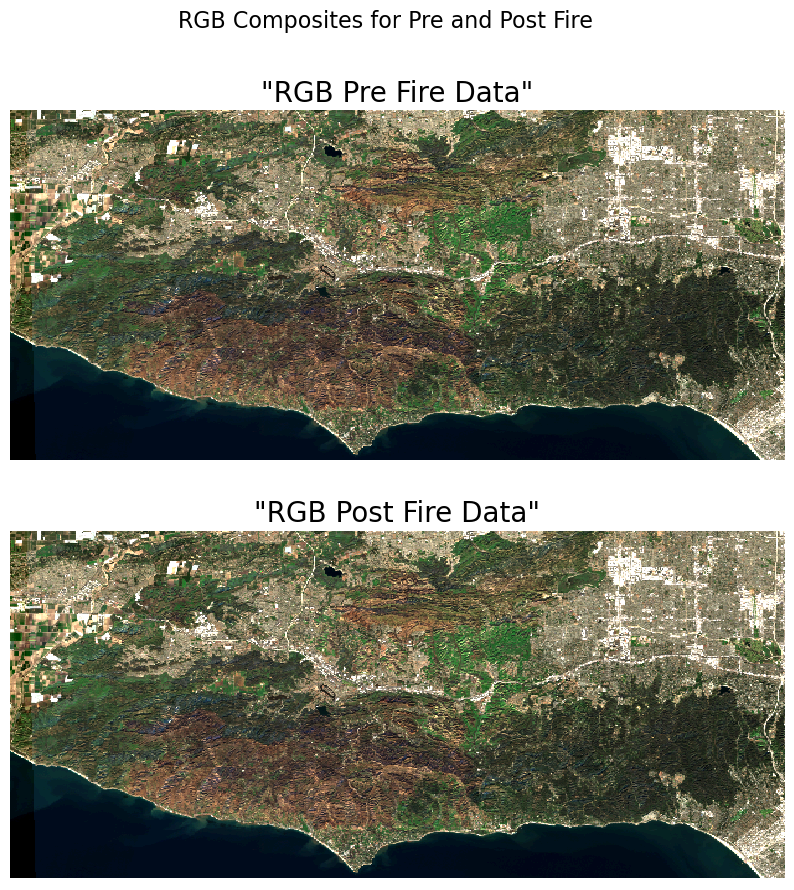

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

pre_fire_rgb.plot.imshow(rgb="band",
                        robust = True, 
                        ax=ax1)
ax1.set_title('"RGB Pre Fire Data"')

post_fire_rgb.plot.imshow(rgb="band",
                        robust = True, 
                        ax=ax2)
ax2.set_title('"RGB Post Fire Data"')

plt.suptitle('RGB Composites for Pre and Post Fire', fontsize=16)
ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()

In [10]:
#Calculate NVDI similarly to previous homework

red = rxr.open_rasterio(pre_fire_paths[0], masked=True).squeeze()
nir = rxr.open_rasterio(pre_fire_paths[7], masked=True).squeeze()

red2 = rxr.open_rasterio(post_fire_paths[0], masked=True).squeeze()
nir2 = rxr.open_rasterio(post_fire_paths[7], masked=True).squeeze()

pre_fire_NVDI = (nir - red) / (nir + red)
post_fire_NVDI = (nir2 - red2) / (nir2 + red2)

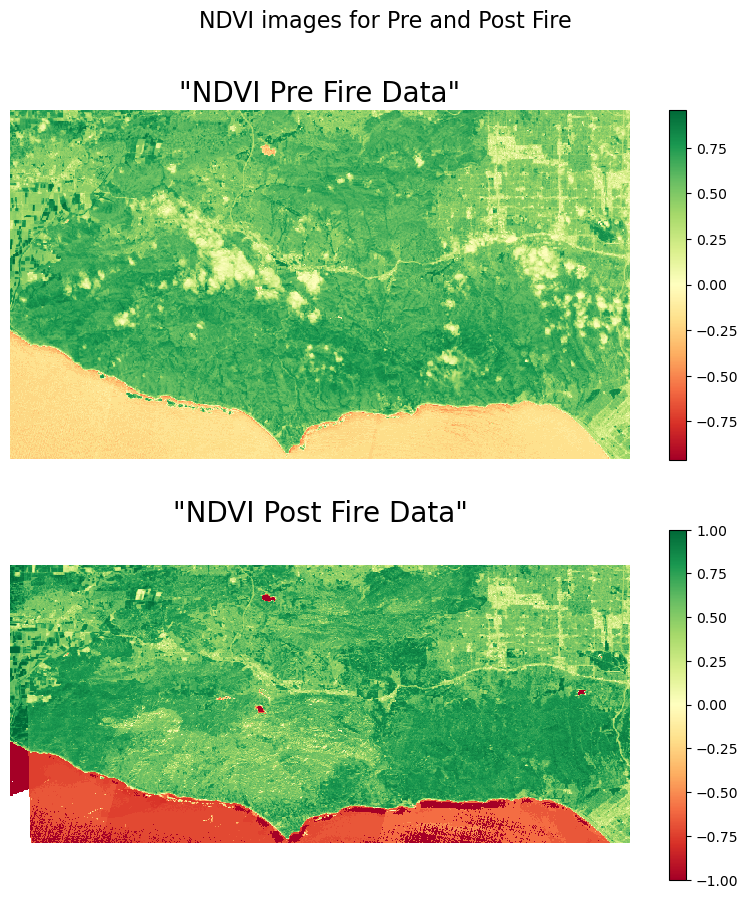

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

pre_fire_NVDI.plot.imshow(cmap="RdYlGn",
                            ax=ax1)
ax1.set_title('"NDVI Pre Fire Data"')

post_fire_NVDI.plot.imshow(cmap="RdYlGn",
                            ax=ax2)
ax2.set_title('"NDVI Post Fire Data"')

plt.suptitle('NDVI images for Pre and Post Fire', fontsize=16)
ax1.set_axis_off()
ax2.set_axis_off()

plt.axis('equal')
plt.show()

A few main differences I notice in both maps are color and contrast. We can notice more bands of light in RGB by simply realizing you get the ocean's blue color and other tones on earth that might indicate dead vegetation or other terrains other than green vegetation. In NDVI, two bands of light limit the map to estimated vegetation and zones affected by the fire where there isnt any alive vegetation, so it shows up red. This is confused with the ocean as well as it shows up red or yellow. 